# SEIS 631 - Final Project - Group 4
Yue Cade \
Tony Challeen \
Siphosenkosi Mpofu \
Jason Shapiro \
Brian Susick

In [72]:
# IMPORTS
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


Q1) Show me the market trends to help me decide. Which US real-estate market is doing best overall. 

* Assumptions:
    * For general market trends, we're going to stick with smoothed/seasonal data
    * The market was affected by the pandemic, so we're going to stick with short term data, 1-2 years.
    * To begin, we'll look at home value forcasts to get a general sense of which regional markets we want to focus in on
    

In [73]:
# Load the data

# Zillow Home Value Forecast (ZHVF): 
# Each numerical value represents the projected percentage change. 
# Example: 0.2 = 2% increase; -0.2 = 2% decrease in home values

df = pd.read_csv("data/Metro_zhvf_growth_uc_sfrcondo_tier_0.33_0.67_sm_sa_month.csv")

display(df.head(5))  
display(df.tail(5))
display(df.count())

,RegionID,SizeRank,RegionName,RegionType,StateName,BaseDate,2024-11-30,2025-01-31,2025-10-31
0,102001,0,United States,country,NaN,2024-10-31,0.2,0.6,2.9
1,394913,1,"New York, NY",msa,NY,2024-10-31,0.3,0.5,1.5
2,753899,2,"Los Angeles, CA",msa,CA,2024-10-31,0.2,0.4,2.3
3,394463,3,"Chicago, IL",msa,IL,2024-10-31,0.1,0.2,1.1
4,394514,4,"Dallas, TX",msa,TX,2024-10-31,-0.2,-0.7,1.2


,RegionID,SizeRank,RegionName,RegionType,StateName,BaseDate,2024-11-30,2025-01-31,2025-10-31
890,753929,935,"Zapata, TX",msa,TX,2024-10-31,-0.8,-2.6,-7.2
891,394743,936,"Ketchikan, AK",msa,AK,2024-10-31,0.2,0.1,-0.9
892,753874,937,"Craig, CO",msa,CO,2024-10-31,0.4,1.0,4.4
893,395188,938,"Vernon, TX",msa,TX,2024-10-31,-1.4,-2.2,-4.3
894,394767,939,"Lamesa, TX",msa,TX,2024-10-31,-0.2,-0.7,-4.5


RegionID      895
SizeRank      895
RegionName    895
RegionType    895
StateName     894
BaseDate      895
2024-11-30    895
2025-01-31    895
2025-10-31    895
dtype: int64

In [74]:
# List number of rows
print("Before: number of rows: ", df.shape)
 
# Drop the duplicates - (no duplicates found)
df = df.drop_duplicates()
print("After: number of rows: ", df.shape)
 
# Drop Missing/Null Values (no null values found)
print("Sum of null values: ", df.isnull().sum())

# Drop rows with NaN values
display(df.count())
df = df.dropna() 
display(df.count())

display(df.head(5))
display(df.tail(5))

# This data is exceptionally clean - we only needed to drop the 1st row which isn't at the state level

Before: number of rows:  (895, 9)
After: number of rows:  (895, 9)
Sum of null values:  RegionID      0
SizeRank      0
RegionName    0
RegionType    0
StateName     1
BaseDate      0
2024-11-30    0
2025-01-31    0
2025-10-31    0
dtype: int64


RegionID      895
SizeRank      895
RegionName    895
RegionType    895
StateName     894
BaseDate      895
2024-11-30    895
2025-01-31    895
2025-10-31    895
dtype: int64

RegionID      894
SizeRank      894
RegionName    894
RegionType    894
StateName     894
BaseDate      894
2024-11-30    894
2025-01-31    894
2025-10-31    894
dtype: int64

,RegionID,SizeRank,RegionName,RegionType,StateName,BaseDate,2024-11-30,2025-01-31,2025-10-31
1,394913,1,"New York, NY",msa,NY,2024-10-31,0.3,0.5,1.5
2,753899,2,"Los Angeles, CA",msa,CA,2024-10-31,0.2,0.4,2.3
3,394463,3,"Chicago, IL",msa,IL,2024-10-31,0.1,0.2,1.1
4,394514,4,"Dallas, TX",msa,TX,2024-10-31,-0.2,-0.7,1.2
5,394692,5,"Houston, TX",msa,TX,2024-10-31,-0.2,-0.6,0.6


,RegionID,SizeRank,RegionName,RegionType,StateName,BaseDate,2024-11-30,2025-01-31,2025-10-31
890,753929,935,"Zapata, TX",msa,TX,2024-10-31,-0.8,-2.6,-7.2
891,394743,936,"Ketchikan, AK",msa,AK,2024-10-31,0.2,0.1,-0.9
892,753874,937,"Craig, CO",msa,CO,2024-10-31,0.4,1.0,4.4
893,395188,938,"Vernon, TX",msa,TX,2024-10-31,-1.4,-2.2,-4.3
894,394767,939,"Lamesa, TX",msa,TX,2024-10-31,-0.2,-0.7,-4.5


In [75]:
# Rename column headers to snake_case and more appropriate terms
df = df.rename(columns={"RegionID": "region_id", 
                        "SizeRank": "size_rank", 
                        "RegionName": "metro_area",
                        "RegionType": "region_type",
                        "StateName": "state_name",
                        "BaseDate": "base_date", 
                        "2024-11-30": "month_ahead_forecast", 
                        "2025-01-31": "quarter_ahead_forecast", 
                        "2025-10-31": "year_ahead_forecast"})
df.head(5)

# View a couple of columns to confirm the suspicion that the data is redundant/repeated or simply not needed
display(df['region_type'].unique())
display(df['base_date'].unique())

# Drop unnecessary columns
df = df.drop(["region_id", "size_rank", "region_type", "base_date"], axis=1)
display(df.head(5))

array(['msa'], dtype=object)

array(['2024-10-31'], dtype=object)

,metro_area,state_name,month_ahead_forecast,quarter_ahead_forecast,year_ahead_forecast
1,"New York, NY",NY,0.3,0.5,1.5
2,"Los Angeles, CA",CA,0.2,0.4,2.3
3,"Chicago, IL",IL,0.1,0.2,1.1
4,"Dallas, TX",TX,-0.2,-0.7,1.2
5,"Houston, TX",TX,-0.2,-0.6,0.6


In [76]:
# Add a "Region" column

# Define the regions
northeast = ["CT", "ME", "MA", "NH", "RI", "VT", "NJ", "NY", "PA"]
midwest = ["IL", "IN", "IA", "KS", "MI", "MN", "MO", "NE", "ND", "OH", "SD", "WI"]
south = ["AL", "AR", "DE", "FL", "GA", "KY", "LA", "MD", "MS", "NC", "OK", "SC", "TN", "TX", "VA", "WV"]
west = ["AK", "AZ", "CA", "CO", "HI", "ID", "MT", "NV", "NM", "OR", "UT", "WA", "WY"]

# Map states to regions
region_map = {}
region_map.update({state: "northeast" for state in northeast})
region_map.update({state: "midwest" for state in midwest})
region_map.update({state: "south" for state in south})
region_map.update({state: "west" for state in west})

display(region_map)

# Add the Region column
df.insert(2, "region", df["state_name"].map(region_map))

df.head(5)


{'CT': 'northeast',
 'ME': 'northeast',
 'MA': 'northeast',
 'NH': 'northeast',
 'RI': 'northeast',
 'VT': 'northeast',
 'NJ': 'northeast',
 'NY': 'northeast',
 'PA': 'northeast',
 'IL': 'midwest',
 'IN': 'midwest',
 'IA': 'midwest',
 'KS': 'midwest',
 'MI': 'midwest',
 'MN': 'midwest',
 'MO': 'midwest',
 'NE': 'midwest',
 'ND': 'midwest',
 'OH': 'midwest',
 'SD': 'midwest',
 'WI': 'midwest',
 'AL': 'south',
 'AR': 'south',
 'DE': 'south',
 'FL': 'south',
 'GA': 'south',
 'KY': 'south',
 'LA': 'south',
 'MD': 'south',
 'MS': 'south',
 'NC': 'south',
 'OK': 'south',
 'SC': 'south',
 'TN': 'south',
 'TX': 'south',
 'VA': 'south',
 'WV': 'south',
 'AK': 'west',
 'AZ': 'west',
 'CA': 'west',
 'CO': 'west',
 'HI': 'west',
 'ID': 'west',
 'MT': 'west',
 'NV': 'west',
 'NM': 'west',
 'OR': 'west',
 'UT': 'west',
 'WA': 'west',
 'WY': 'west'}

,metro_area,state_name,region,month_ahead_forecast,quarter_ahead_forecast,year_ahead_forecast
1,"New York, NY",NY,northeast,0.3,0.5,1.5
2,"Los Angeles, CA",CA,west,0.2,0.4,2.3
3,"Chicago, IL",IL,midwest,0.1,0.2,1.1
4,"Dallas, TX",TX,south,-0.2,-0.7,1.2
5,"Houston, TX",TX,south,-0.2,-0.6,0.6


,month_ahead_forecast,quarter_ahead_forecast,year_ahead_forecast,overall_forecast
region,,,,
midwest,0.242857,0.522344,2.251648,1.005617
northeast,0.182022,0.431461,2.943820,1.185768
south,-0.123184,-0.188547,1.452793,0.380354
west,0.069540,-0.016092,1.897701,0.650383


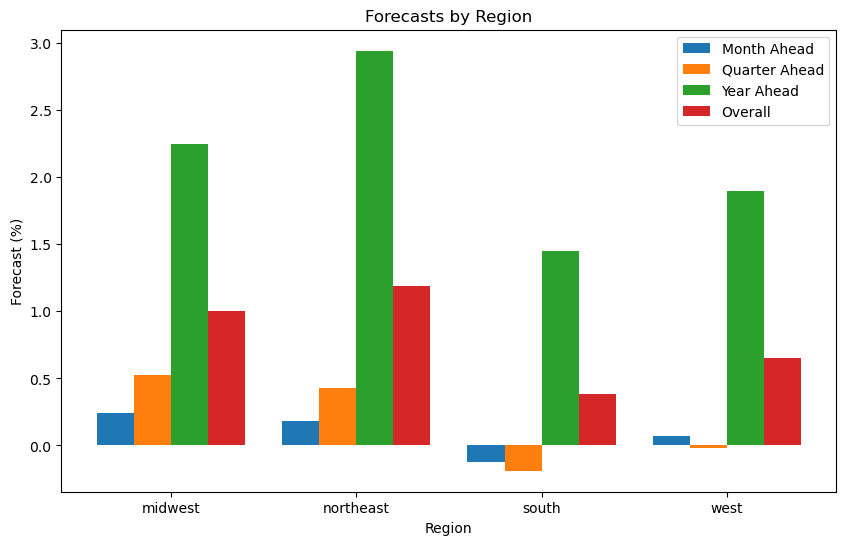

In [77]:
# Calculate overall forecast
df['overall_forecast'] = df[['month_ahead_forecast', 'quarter_ahead_forecast', 'year_ahead_forecast']].mean(axis=1)

# Group by region and calculate mean forecasts
grouped_df = df.groupby('region').mean(numeric_only=True)
display(grouped_df)

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))

# Define bar width and positions
bar_width = 0.2
index = np.arange(len(grouped_df))

# Plot each forecast type
ax.bar(index, grouped_df['month_ahead_forecast'], bar_width, label='Month Ahead')
ax.bar(index + bar_width, grouped_df['quarter_ahead_forecast'], bar_width, label='Quarter Ahead')
ax.bar(index + bar_width * 2, grouped_df['year_ahead_forecast'], bar_width, label='Year Ahead')
ax.bar(index + bar_width * 3, grouped_df['overall_forecast'], bar_width, label='Overall')

# Set labels and title
ax.set_xlabel('Region')
ax.set_ylabel('Forecast (%)')
ax.set_title('Forecasts by Region')
ax.set_xticks(index + bar_width * 1.5)
ax.set_xticklabels(grouped_df.index)
ax.legend()

# Show plot
plt.show()

## Bar Chart Conclusions
* Northeast has the most positive outlook for a year ahead and overall price increase
* Midwest has the most positive outlook for a month and quarter ahead

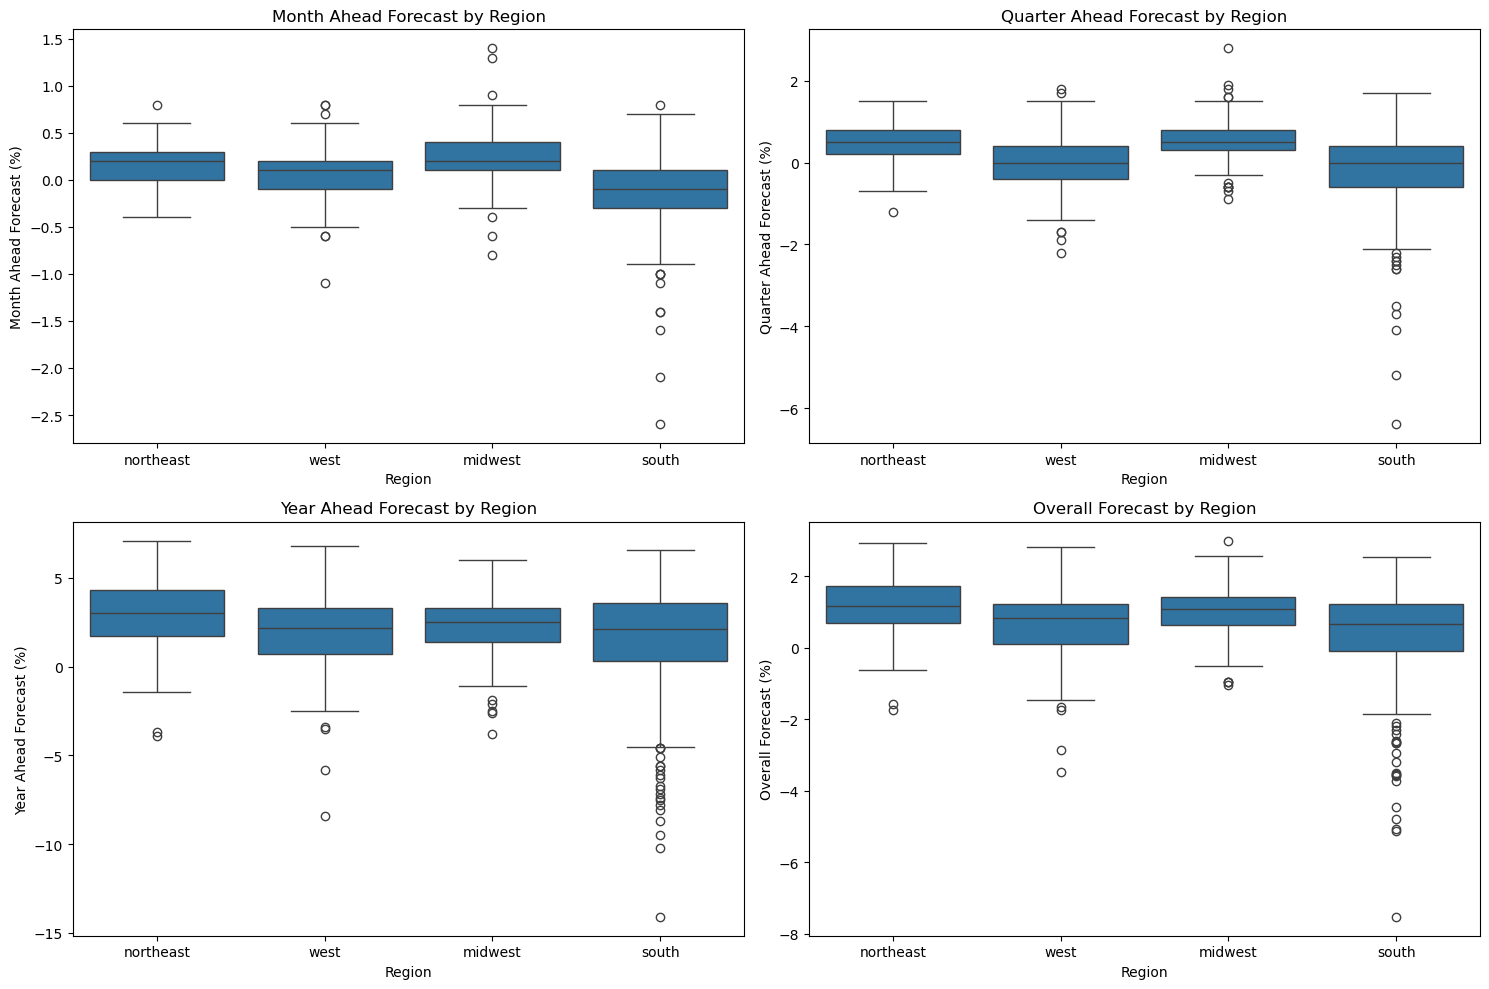

In [78]:
# Create box plots for each forecast type by region
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

sns.boxplot(x='region', y='month_ahead_forecast', data=df, ax=axes[0, 0])
axes[0, 0].set_title('Month Ahead Forecast by Region')
axes[0, 0].set_xlabel('Region')
axes[0, 0].set_ylabel('Month Ahead Forecast (%)')

sns.boxplot(x='region', y='quarter_ahead_forecast', data=df, ax=axes[0, 1])
axes[0, 1].set_title('Quarter Ahead Forecast by Region')
axes[0, 1].set_xlabel('Region')
axes[0, 1].set_ylabel('Quarter Ahead Forecast (%)')

sns.boxplot(x='region', y='year_ahead_forecast', data=df, ax=axes[1, 0])
axes[1, 0].set_title('Year Ahead Forecast by Region')
axes[1, 0].set_xlabel('Region')
axes[1, 0].set_ylabel('Year Ahead Forecast (%)')

sns.boxplot(x='region', y='overall_forecast', data=df, ax=axes[1, 1])
axes[1, 1].set_title('Overall Forecast by Region')
axes[1, 1].set_xlabel('Region')
axes[1, 1].set_ylabel('Overall Forecast (%)')

plt.tight_layout()
plt.show()

## Box Plot Conclusions
* Month Ahead
    * Variance is pretty similar across the board
    * Northeast and Midwest have the highest increases, with Northeast having a high median (stable price growth)
* Quarter Ahead
    * Similar results to Month Ahead IQR
* Year Ahead
    * Northeast has the highest growth and a high median
    * South has a great number of outliers
* Overall
    * Northeast has the highest growth and a moderate median

Q2) Are the sale prices and inventory listing going up or down overall in the US? - Brian

Q3) Should I wait to invest or should I invest now and if so then where should I invest. (You could recommend more than one place)? - Sipho

Q4) How long some of the real-estate stays on the market before they rent or sell? - Tony

Q5) How much average profit I could expect from my investments in terms of sale (% dollars) after paying mortgage. Calculate my ~ROI

Q6) How much average monthly income I could expect from my investments in terms of lease/rent after upgrading properties, paying mortgage, and paying taxes. Calculate my ~ROI.